<h1>Analysis Report</h1>

<h4>Sophia Swengel</h4>

November 21, 2023

<hr/>

<p>Music has always played a large role in my life, and one of the groups that I have come to appreciate in helping develop my relationship with music is the Who. As a child, I was enthralled by their influential rock opera <i>Tommy</i> as I came to appreciate music as not just a vessel for entertainment but a serious art form. I would listen to the album repeatedly trying to understand the intricacies of its storytelling, mystified by its monolithic status in my sheltered mind. As I grew older I would drift away into other forms of music, but I would listen to other albums by the band over the years for various reasons. It was not until very recently when, while revisiting songs from <i>Tommy</i>, it finally clicked with me the band's genius, and I was motivated to explore their discography more in depth. From there I would fall in love with their preceding album, <i>The Who Sell Out</i>, an album more abstract in its playful pop art concept but nevertheless endearing and thrilling. I love both albums for their recognition of the power of music to enlighten, engage, bewilder, and excite audiences. Across the two albums, the Who exemplified both the psychedelic angst of the sixties and the intellectual capability of 'popular' music, albeit through different ways. Using Spotify's API we can analyze certain aspects of the songs on these albums and compare and contrast the two works.</p>

<p>First let's load in everything we need to access and analyze the Spotify API.</p>

In [42]:
import requests
import pandas as pd
import base64
import json
import urllib
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [43]:
client_id = pd.read_csv('Spotify_Keys_September_19.txt')['Client_ID'].iloc[0]
#client_id

In [44]:
client_secret = pd.read_csv('Spotify_Keys_September_19.txt')['Client_Secret'].iloc[0]
#client_secret

In [45]:
client_cred = base64.b64encode(str(client_id + ":" + client_secret).encode('ascii'))
#client_cred

In [46]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}
#headers

In [47]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [48]:
session_key_response = requests.post(url = url, data = payload, headers = headers)
session_key_response.status_code

200

In [49]:
session_header_key = session_key_response.json()
key = session_header_key['access_token']

In [50]:
session_headers = {"Authorization": "Bearer {}".format(key)}
#session_headers

<p>Now that we have this access and everything works, let's load in the IDs for the albums in question.</p>

In [51]:
sellout_id = '2nSduHVT17MPQCehfMRPG6'
tommy_id = '5cT7ee1sy2oEbFalP4asS4'

<p>Then we can use the album IDs to load the individual tracks for each album.</p>

In [52]:
sellout_tracks_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(sellout_id)
tommy_tracks_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(tommy_id)

In [53]:
sellout_tracks_response = requests.get(url = sellout_tracks_url, headers = session_headers)
tommy_tracks_response = requests.get(url = tommy_tracks_url, headers = session_headers)

In [54]:
sellout_tracks_response

<Response [200]>

In [55]:
tommy_tracks_response

<Response [200]>

In [56]:
sellout_tracks_data = sellout_tracks_response.json()
tommy_tracks_data = tommy_tracks_response.json()
tommy_tracks_data['items'][0]['id']

'3P0VltjBDpzJeFFHVpF0nK'

<p>We can access the ID for each track by navigating through the data as shown above. From there we can create dataframes for the tracks which we can convert into lists of the ID values for each track.</p>

In [57]:
sellout_tracks_df = pd.DataFrame(sellout_tracks_data['items'])
tommy_tracks_df = pd.DataFrame(tommy_tracks_data['items'])

In [58]:
sellout_id_list = ','.join(list(sellout_tracks_df['id']))
tommy_id_list = ','.join(list(tommy_tracks_df['id']))
tommy_id_list

'3P0VltjBDpzJeFFHVpF0nK,0gH9pmlL8dGiXb1DyC08SC,2EJo2k8xmQsA3E5VwTta7I,79I2QsiBddxxjhWNU7EYNH,0Ly4wvpmDlFjh0h2CsmpVh,1r2kOFHLnTCdizctXDH3On,1WggjG5H91qHvt2sS7NT8c,0sLfxEt1uo2Q0qCNC3CwRp,4rsxuPgzQGwaumPAVKW6qD,5xCS1F6o2OXzu5fiPHnFaN,7G7xkB6rbJONVwXwd0UaIx,0YX1KQpkI2Y2jFbYhhkASg,6LbbHFEajG9e4m0G3L47c4,6l0j8z0ronFPuta5ywXdE9,4k6ejdRv0n3jsXnwdW42t7,0HLIhUYvZdxemJ5vHJsSBy,4TPVkE5RfBquAWWepS4ieM,3PYnaAsicdQPk2mkdRdYz7,1tYhZjz0e6Ar9RTcJfLy8S,5FUkpnewHKPq2rm4OoYQ2e'

<p>Now let's use these lists to access the API to view the audio features for each track.</p>

In [59]:
sellout_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(sellout_id_list)
tommy_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(tommy_id_list)

In [60]:
sellout_features_response = requests.get(url = sellout_features_url, headers = session_headers)
tommy_features_response = requests.get(url = tommy_features_url, headers = session_headers)

In [61]:
sellout_features_response

<Response [200]>

In [62]:
tommy_features_response

<Response [200]>

<p>This data can now be converted into dataframes for each track.</p>

In [63]:
sellout_features_data = sellout_features_response.json()
tommy_features_data = tommy_features_response.json()

In [64]:
sellout_features_df = pd.DataFrame(sellout_features_data['audio_features'])
tommy_features_df = pd.DataFrame(tommy_features_data['audio_features'])
tommy_features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

<p>As we can see these individual data frames do not contain a column identifying the album title, which we will need later. We can manually insert this column for both frames. Afterwards, we merge the frames together for one coherent document that facilitates the analysis of audio features across the two albums.</p>

In [65]:
sellout_features_df['album'] = ('sellout')
tommy_features_df['album'] = ('tommy')

In [66]:
frame = pd.merge(sellout_features_df, tommy_features_df, how = 'outer')
frame

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.260,0.637,8,-8.426,1,0.0552,0.155000,0.000003,0.3910,0.3490,131.464,audio_features,2sPv6pUyjuGsTHPGLdv8PF,spotify:track:2sPv6pUyjuGsTHPGLdv8PF,https://api.spotify.com/v1/tracks/2sPv6pUyjuGs...,https://api.spotify.com/v1/audio-analysis/2sPv...,227867,4,sellout
1,0.633,0.536,11,-12.399,1,0.2460,0.555000,0.011400,0.1330,0.5530,122.105,audio_features,0e9e7vOTvNcofMQUOxoRbs,spotify:track:0e9e7vOTvNcofMQUOxoRbs,https://api.spotify.com/v1/tracks/0e9e7vOTvNco...,https://api.spotify.com/v1/audio-analysis/0e9e...,60427,4,sellout
2,0.542,0.741,9,-10.312,1,0.0724,0.242000,0.000002,0.7220,0.8170,137.424,audio_features,3SvcGBh8h901iwiOWpLOL0,spotify:track:3SvcGBh8h901iwiOWpLOL0,https://api.spotify.com/v1/tracks/3SvcGBh8h901...,https://api.spotify.com/v1/audio-analysis/3Svc...,148707,4,sellout
3,0.617,0.546,9,-11.038,1,0.0793,0.128000,0.000000,0.3330,0.4880,125.420,audio_features,7uxMGHYBb97Xr7CCzXOMWS,spotify:track:7uxMGHYBb97Xr7CCzXOMWS,https://api.spotify.com/v1/tracks/7uxMGHYBb97X...,https://api.spotify.com/v1/audio-analysis/7uxM...,154600,4,sellout
4,0.578,0.351,5,-11.610,1,0.0281,0.251000,0.000055,0.3150,0.2610,112.332,audio_features,5Ghyl9pBTYueA13Z3oKAwX,spotify:track:5Ghyl9pBTYueA13Z3oKAwX,https://api.spotify.com/v1/tracks/5Ghyl9pBTYue...,https://api.spotify.com/v1/audio-analysis/5Ghy...,171600,4,sellout
5,0.386,0.528,9,-10.323,1,0.0339,0.096000,0.000000,0.3200,0.5650,144.641,audio_features,61zXe3Z1tSDz4lok51LS5q,spotify:track:61zXe3Z1tSDz4lok51LS5q,https://api.spotify.com/v1/tracks/61zXe3Z1tSDz...,https://api.spotify.com/v1/audio-analysis/61zX...,203293,4,sellout
6,0.397,0.707,9,-9.758,1,0.0654,0.031300,0.000000,0.1480,0.2540,131.445,audio_features,60XhKk8WC7RALPENkgSfT5,spotify:track:60XhKk8WC7RALPENkgSfT5,https://api.spotify.com/v1/tracks/60XhKk8WC7RA...,https://api.spotify.com/v1/audio-analysis/60Xh...,284166,4,sellout
7,0.560,0.688,7,-8.266,1,0.0420,0.055100,0.000000,0.0613,0.7420,132.650,audio_features,1cVEJpv7D6mN4mu1CqUwru,spotify:track:1cVEJpv7D6mN4mu1CqUwru,https://api.spotify.com/v1/tracks/1cVEJpv7D6mN...,https://api.spotify.com/v1/audio-analysis/1cVE...,183907,4,sellout
8,0.637,0.472,2,-9.461,1,0.0493,0.051200,0.000000,0.2790,0.9420,127.083,audio_features,7xc1UdJbr3ylhcx7DIZc8N,spotify:track:7xc1UdJbr3ylhcx7DIZc8N,https://api.spotify.com/v1/tracks/7xc1UdJbr3yl...,https://api.spotify.com/v1/audio-analysis/7xc1...,57400,4,sellout
9,0.397,0.539,9,-7.963,1,0.0309,0.016400,0.002120,0.4270,0.2380,131.596,audio_features,03ZuiUu7KVr1Bu4Ml855vp,spotify:track:03ZuiUu7KVr1Bu4Ml855vp,https://api.spotify.com/v1/tracks/03ZuiUu7KVr1...,https://api.spotify.com/v1/audio-analysis/03Zu...,161760,4,sellout


<p>The two key audio features we will be analyzing are <b>energy</b> and <b>valence</b>.</p>

<ul>
    <li>
        Use of <b>energy</b> plays an interesting role in both albums. <i>Sell Out</i> is varied in its sonic stylings between songs, from speed to sentimentality, making it almost a cultural time capsule of the era. <i>Tommy</i> on the otherhand is generally more contemplative and even ethereal across the board, making it a holistically introspective and meditative experience.
    </li>
    <li>
        <b>Valence</b>, or the 'happiness' of the music, is possibly the most important value of each album, since both communicate complex emotions through their structures, concepts, and lyrics. <i>Sell Out</i> portrays sixties sounds and styles with a wry sense of humor, including satirical ad jingles and bumpers as a tribute to the beloved pirate radio stations being cracked down upon at the time. This leaves even its more happy and defiant songs tinged with a complex nostalgia and, of course, classic Who angst. <i>Tommy</i> on the other hand is tinged with aching beauty and affecting melancholia even its its more upbeat tracks as it tells its complex and unconventional plot. The album exemplifies the band's ability to write songs about strange or controversial subjects that still allure and enthrall - and, most importantly, get stuck in your head for days after listening.
    </li>
</ul>

<p>We can compare these features across both albums using histograms using matplotlib.pyplot, loading in the values from the data frame.</p>

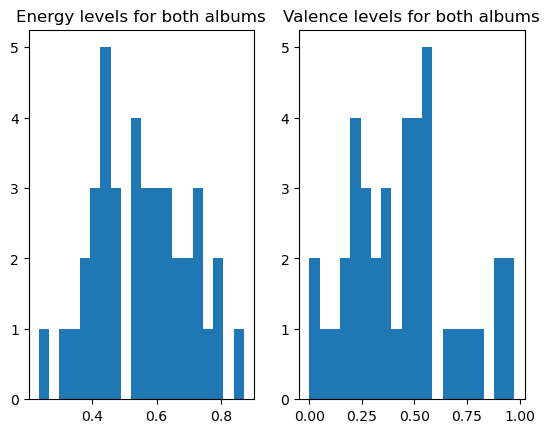

In [67]:
fig1, ax1 = plt.subplots(1, 2)

ax1[0].hist(frame['energy'], bins = 20)
ax1[0].set_title('Energy levels for both albums')

ax1[1].hist(frame['valence'], bins = 20)
ax1[1].set_title('Valence levels for both albums')

plt.show()

<p>In terms of valence, the albums skew heavily towards low or middling levels of valence, reflecting the meditative melancholia present among both works. Some outliers reflect the albums' more peppy moments. The energy levels more closely resemble a standard distribution curve, but with many gaps and spikes in between wth a slight shift towards low energy. Neither energy nor valence levels are evenly distributed across the two albums.</p>

<p>To analyze the presence of features among the two albums seperately, we can create individual scatter plots for each using pyplot.scatter.</p>

<p>In order to streamline the process, we can first create variables for the columns in the dataframe for the two albums seperately. We will be reusing these later. Then we can make the scatter plots themselves.</p>

In [68]:
s_energy = frame[frame['album'] == 'sellout']['energy']
t_energy = frame[frame['album'] == 'tommy']['energy']

s_valence = frame[frame['album'] == 'sellout']['valence']
t_valence = frame[frame['album'] == 'tommy']['valence']

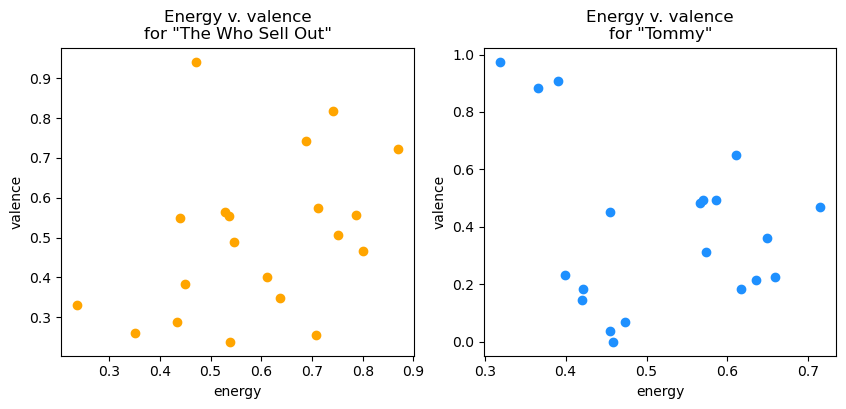

In [69]:
fig2, ax2 = plt.subplots(1, 2, figsize = (10, 4))

ax2[0].scatter(x = s_energy, y = s_valence, color = 'orange')
ax2[0].set_title('Energy v. valence\nfor "The Who Sell Out"')
ax2[0].set_xlabel('energy')
ax2[0].set_ylabel('valence')

ax2[1].scatter(x = t_energy, y = t_valence, color = 'dodgerblue')
ax2[1].set_title('Energy v. valence\nfor "Tommy"')
ax2[1].set_xlabel('energy')
ax2[1].set_ylabel('valence')

plt.show()

<p>From these two graphs, we can see that energy levels in <i>Sell Out</i> are fairly well spread out across the gamut. Most of the songs have low levels of valence, reflecting its melodic and melancholic nature. There is only one real outlier song with extremely high valence from the larger cluster of songs in a like region of the bottom half of the graph.</p>

<p><i>Tommy</i> is more all over the place, with many songs clustering together in terms of synchronous valence and energy levels. Considering the repeated motifs throughout the album, this clustering is somewhat understandable. Valence levels are, as with <i>Sell Out</i>, quite low, with more energetic songs. There are three jarring outliers with very low energy and very high valence! That is surprising.</p>

<p>To better compare the two albums side by side, we can create a scatter plot combining the two. We ca use numerous features of matplotlib, such as choosing color coordination for the markers for each album, changing the shapes of the markers, and generating a legend so the plot is easier to understand.</p>

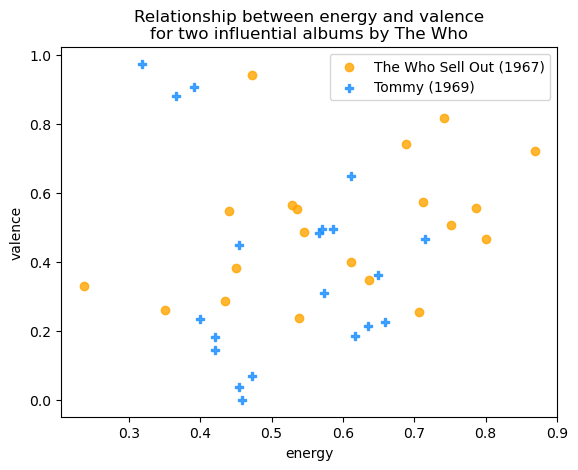

In [70]:
fig3, ax3 = plt.subplots()

ax3.scatter(x = s_energy, y = s_valence, label = 'The Who Sell Out (1967)', color = 'orange', marker = 'o', alpha = 0.8)
ax3.scatter(x = t_energy, y = t_valence, label = 'Tommy (1969)', color = 'dodgerblue', marker = 'P', alpha = 0.8)

ax3.set_title('Relationship between energy and valence\nfor two influential albums by The Who')
ax3.set_xlabel('energy')
ax3.set_ylabel('valence')
ax3.legend()

plt.show()

<p>Putting the two albums alongside each other in this manner allows us to more fully grasp the similarities and differences between energy and valence levels. Many songs across the two contain similar energy and valence levels. Clustering is present even among songs from the two different albums. We can view that <i>Sell Out</i> is more varied in its levels of both energy and valence while <i>Tommy</i> is more centered between 0.4 and 0.7 level energy and below 0.7 level valence.</p>

<p>Let's compare the valence points between the two albums using a box plot which will represent the mean, percentile, minimum, maximum, and outlier values. By combining this with a scatter plot, we can see where the individual songs fall on the box plot.</p>

<p>First let's generate a jitter variable for the scatter points so they are easier to view, and then let's generate the graph.</p>

In [71]:
s_xs = [1] * len(s_valence)
t_xs = [2] * len(t_valence)

s_x_jitter = np.random.uniform(-0.10, 0.10, len(s_xs))
t_x_jitter = np.random.uniform(-0.10, 0.10, len(t_xs))

xlabel = list(['left', 'right'])

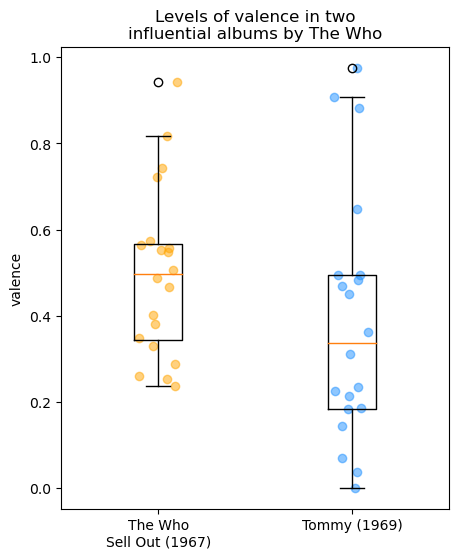

In [72]:
fig4, ax4 = plt.subplots(figsize = (5, 6))

ax4.boxplot(s_valence, positions = [1], widths = [0.25])
ax4.boxplot(t_valence, positions = [2], widths = [0.25])

ax4.scatter(s_xs + s_x_jitter, s_valence, color = 'orange', alpha = 0.5)
ax4.scatter(t_xs + t_x_jitter, t_valence, color = 'dodgerblue', alpha = 0.5)

ax4.set_title('Levels of valence in two\ninfluential albums by The Who')

labels = [item.get_text() for item in ax4.get_xticklabels()]
labels[0] = 'The Who\nSell Out (1967)'
labels[1] = 'Tommy (1969)'
ax4.set_xticklabels(labels)

ax4.set_ylabel('valence')

plt.show()

<p>I am impressed by the adherence of both albums to clustering around the 25th and 75th percentile and minimum markers, and <i>Tommy</i> with the maximum marker. Both have jarring outliers. it is interesting the limit being pushed with the area between the 75th percentile value and the maximum, especially with <i>Tommy</i>.</p>

<p>The mean valence for <i>Sell Out</i> is around 0.5 while <i>Tommy</i>'s is around 0.35, which is unsurprising considering the overall mood of the latter. <i>Tommy</i> sinks very low in levels of valence while <i>Sell Out</i> maintains a more steady middle level of valence throughout. Both albums have four songs that are much 'happier' than the rest while the rest are slumped below 0.6. I had expected higher levels of valence overall for <i>Sell Out</i>, so that is interesting.</p>

<p>From this we can test for statistical differences between the two albums with Scipy.</p>

In [73]:
result_valence = stats.ttest_ind(s_valence, t_valence)
result_valence.statistic, round(result_valence.pvalue, 3)

(1.4209009375508959, 0.164)

<p>These differences are based on the formula 'Y = (B * X) + error'. The statistic is the 'B' value while the P-value is the error. Considering that these statistics have a very high P-value/level of error, this tells us that the levels of valence across the two albums are very hard to accurately predict in a simple equation. This reflects the variety and complexity of sounds and emotions communicated across the two albums.</p>

<h4>Conclusions</h4>

<p>All of the different graphs are fascinating in how they portray the songs across the two albums. In plain terms, it's <i>neat</i> to see music that you have such an emotional connection to transformed into graphs, statistics, and numbers, ripe to be dissected. It is also interesting comparing your personal experience with an album with how Spotify's technology "judges" an album. No algorithm can ever match a human experience. But the ballad of the stats nerd is real! </p>

<p>In terms of energy and valence, the graph is very intriguing, particularly how songs on both individual albums and across the albums cluster together in terms of similar combined values. The albums do have similar sounds between them; one instrumental on <i>Tommy</i> is even heavily borrowed from a song on <i>Sell Out</i>. However, <i>Sell Out</i> is very raw overall while <i>Tommy</i> has more polish. I am also not shocked that energy levels are more consistent across <i>Tommy</i> due to how more consistent that album's general sound is. With <i>Sell Out</i> the intention was to play up a radio listening experience, so the band try on numerous different hats, to hyperbolize, in what sounds they convey.</p>

<p>Because of <i>Sell Out</i>'s raw sonics, pop sensibility, and more upbeat nature, I expected it to have higher levels of valence than <i>Tommy</i>. That turned out to be true, but I expected them to be much higher than they actually were, even with the bittersweet sounds of many of its songs. <i>Tommy</i>, in telling a very strange and often dark story and more blatant in its sonic beauty, is fittingly low in valence. Its weird melancholia is not hidden as much as on <i>Sell Out</i> anyway. But I expected much more overall variance between the two.</p>

<h4>Limitations, alternative approaches, and next steps</h4>

<p>As noted above, Spotify data is no match for the human listening experience when it comes to analyzing music, though it can provide some interesting insights. Spotify's audio features, while interesting, are simultaneously ambiguous and rigid in terms of how they are determined by algorithms and how they define music. Comparing more than two features as well as other aspects of the songs more in depth could provide a more holistic analysis.</p>

<p>Being unable at this time to label specific points on my graphs, it would be great to revisit this project once I have that ability. I am so curious about the outlier songs between the two albums for the different values, and it would be really fascinating to see what they are. This is particularly potent with the valence levels specifically, as I wonder if the songs that Spotify determines are "happier" than others would be the same as the songs that I personally associate most with those emotions. Knowing the ropes of matplotlib better could open up a whole treasure trove of different ways to play with the data and could help with surpassing this study's numerous limitations.</p>

<p>Different audio features would be interesting to analyse in a different run of the project, particularly liveliness and acousticness since both qualities would definitely vary between the two albums. It could also be interesting to compare the keys the songs are in and see if there is any correlation between valence and type of key, as I know major key songs are traditionally happier than minor key songs but am totally tone deaf when it comes to that by ear.</p>